# Reading the Data

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd

#Importing the datasets
demo = pd.read_csv(r"/kaggle/input/prison-in-india/Prison_details_2015.csv")
#Importing the geometry dataset
gdf = gpd.read_file("/kaggle/input/india-gis-data/India States/Indian_states.shp")
#State wise Number of Jails
state_jails = demo.groupby(['State / UT Name','Jail Type'])['Category'].count().reset_index()
#Pivoting the data
pivot_df = state_jails.pivot(index='State / UT Name', columns='Jail Type', values='Category').fillna(0)

pivot_df.head()

Jail Type,Borstal School,Central Jail,District Jail,Open Jail,Other Jail,Special Jail,Sub Jail,Women Jail
State / UT Name,,,,,,,,
Andhra Pradesh,0.0,4.0,7.0,1.0,0.0,0.0,98.0,1.0
Arunachal Pradesh,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Assam,0.0,6.0,22.0,1.0,0.0,1.0,1.0,0.0
Bihar,0.0,7.0,31.0,1.0,0.0,1.0,17.0,1.0
Chandigarh,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Prisons Info

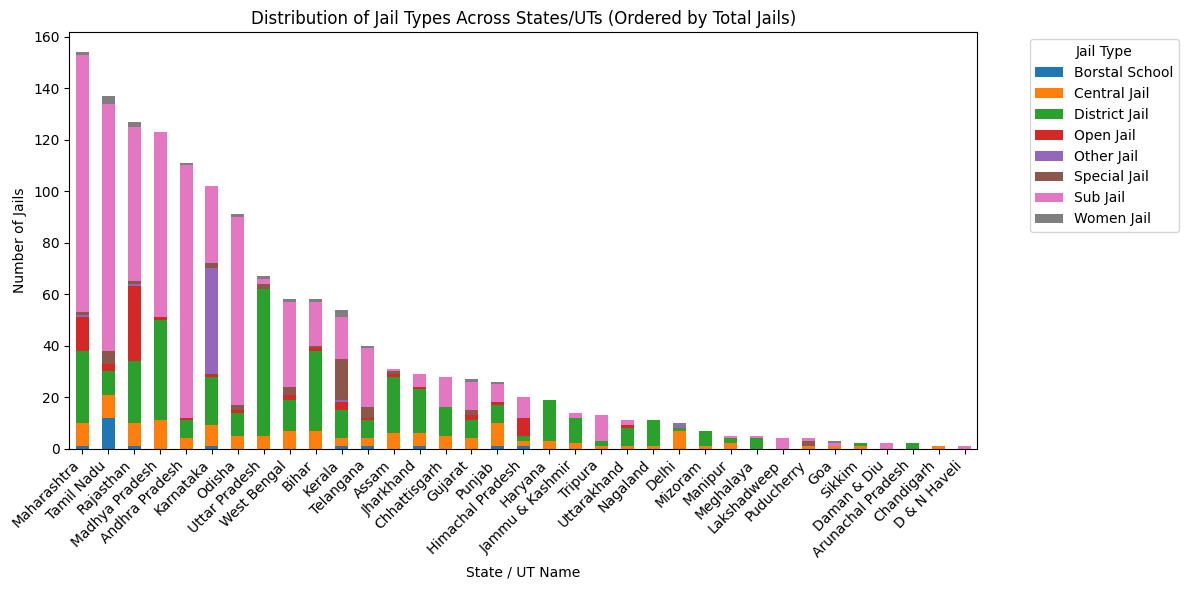

In [2]:
# Calculate the total number of jails for each state
pivot_df['Total'] = pivot_df.sum(axis=1)

# Sort the data by total number of jails in descending order
pivot_df = pivot_df.sort_values(by='Total', ascending=False)

# Plotting
pivot_df.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Jail Types Across States/UTs (Ordered by Total Jails)')
plt.xlabel('State / UT Name')
plt.ylabel('Number of Jails')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Jail Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

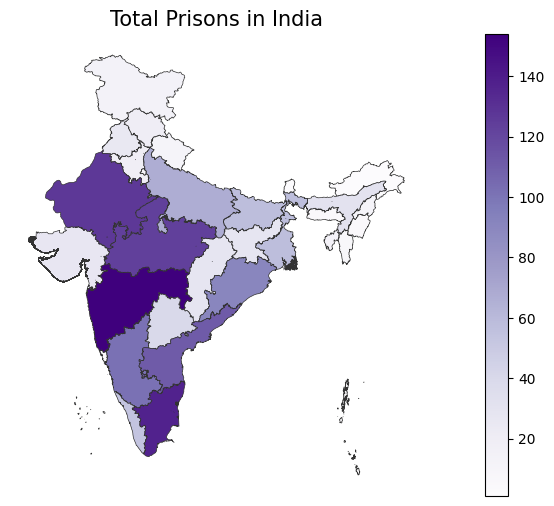

In [3]:
from fuzzywuzzy import process
#Resetting the index
total_jails = pivot_df.reset_index()
#Filtering the selected columns
total_jails = total_jails[['State / UT Name', 'Total']]


#For creating a map, we needed to merge geometry and jails datasets, but few State names aren't matching. We will be using Fuzzy matching to merge.

#Unique state names from Geometry dataset
gdf_unique = gdf['st_nm'].unique()
#Unique state names from Total jails dataset
total_jails_unique = total_jails['State / UT Name'].unique()

# Perform fuzzy matching to find the closest match for each state/UT name
matches = {}
for state in gdf_unique:
    matches[state] = process.extractOne(state, total_jails_unique)[0]

# Replace the state/UT names in gdf with the closest matches
gdf['st_nm'] = gdf['st_nm'].replace(matches)

# Now you can merge the datasets on the common column
merged_data = pd.merge(gdf, total_jails, left_on='st_nm', right_on='State / UT Name')

fig, ax = plt.subplots(1, figsize=(16, 6))
ax.axis('off')
ax.set_title('Total Prisons in India',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged_data.plot(column='Total', cmap='Purples', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)


# Show the plot
plt.show()

In [4]:
caste = pd.read_csv(r"/kaggle/input/prison-in-india/Caste.csv")

caste.head()

,state_name,is_state,year,gender,caste,convicts,under_trial,detenues,others
0,Andhra Pradesh,1,2001,Male,SC,1236,1836,0,5
1,Andhra Pradesh,1,2001,Male,ST,418,1205,0,1
2,Andhra Pradesh,1,2001,Male,OBC,1526,3359,4,8
3,Andhra Pradesh,1,2001,Male,Others,939,1960,0,8
4,Andhra Pradesh,1,2002,Male,SC,1177,1573,2,0


In [5]:
pip install pygwalker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.8/17.8 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 991.5/991.5 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 16.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pygwalker as pg

In [7]:
pg.walk(caste)